In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import torch 
import model
import glob 
import scipy 

In [2]:
N = 100
dt = 0.0001
T = 3
w_in = 50 * 10**-12
f = 5
Ns = [300, 500, 700, 1000]

# A)

In [4]:
# expected time 3 hr
T = 10
N = Ns[0]

model.run(N,f,dt,T,w_in)

100%|██████████| 99999/99999 [1:33:19<00:00, 17.86it/s]


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

# B)

In [ ]:
# expected time 2.5 hr
T = 5
N = Ns[1]
for i in range(5):
    spikes = model.run(N,f,dt,T,w_in)
    torch.save(spikes,f"{N}_{i}.pt")

# C)

In [5]:
# expected time 3 hr
T = 4
N = Ns[2]
for i in range(6):
    spikes = model.run(N,f,dt,T,w_in)
    torch.save(spikes,f"{N}_{i}.pt")

100%|██████████| 39999/39999 [34:52<00:00, 19.11it/s]


# D)

In [ ]:
# expected time 4 hr
T = 3
N = Ns[3]
for i in range(8):
    spikes = model.run(N,f,dt,T,w_in)
    torch.save(spikes,f"{N}_{i}.pt")

In [4]:
spikes300  = torch.concatenate((torch.load("300_0.pt"),torch.load("300_1.pt")),dim=1)

In [5]:
spikes700  = torch.concatenate((torch.load("700_0.pt"),torch.load("700_1.pt"),torch.load("700_2.pt"),torch.load("700_3.pt"),torch.load("700_4.pt"),torch.load("700_5.pt"),torch.load("700_6.pt")),dim=1)

In [6]:
spikes500  = torch.concatenate((torch.load("500_0.pt"),torch.load("500_1.pt"),torch.load("500_2.pt"),torch.load("500_3.pt"),torch.load("500_4.pt"),torch.load("500_5.pt")),dim=1)

In [7]:
spikes1000  = torch.concatenate((torch.load("1000_0.pt"),torch.load("1000_1.pt"),torch.load("1000_2.pt"),torch.load("1000_3.pt"),torch.load("1000_4.pt"),torch.load("1000_5.pt"),torch.load("1000_6.pt"),torch.load("1000_7.pt"),torch.load("1000_8.pt")),dim=1)

(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.]),
 array([1.0000000e+00, 1.5684770e+05, 3.1369441e+05, 4.7054109e+05,
        6.2738781e+05, 7.8423450e+05, 9.4108119e+05, 1.0979279e+06,
        1.2547746e+06, 1.4116212e+06, 1.5684680e+06], dtype=float32),
 <BarContainer object of 10 artists>)

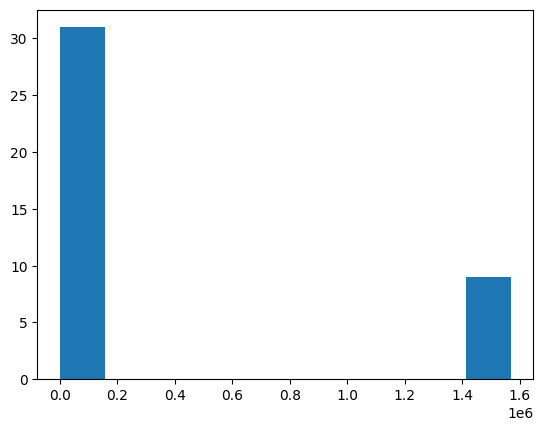

In [27]:
plt.hist(avalanches_size.cpu().numpy(),10)

In [ ]:
np.linspace(avalanches_size.min().cpu() , avalanches_size.max().cpu() , 10  )

tensor([1.0000e+00, 1.7428e+05, 3.4855e+05, 5.2282e+05, 6.9710e+05, 8.7137e+05,
        1.0456e+06, 1.2199e+06, 1.3942e+06, 1.5685e+06])

-0.1944268016304721
torch.Size([5])
-0.04529318727647844
torch.Size([14])
0.017861947741657
torch.Size([40])
0.02604208281233946
torch.Size([28])
0.02021406788644973
torch.Size([40])


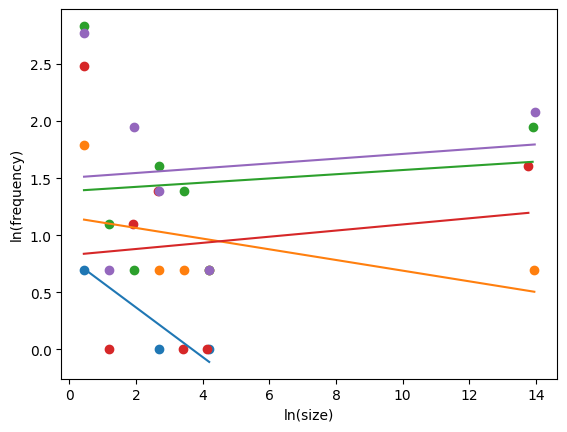

In [53]:
for spikes in [torch.load("1000_0.pt"), spikes300,spikes700,spikes500,spikes1000]:


    avalanch = spikes.sum(0) != 0
    slippingR = avalanch.roll(+1)
    slippingL = avalanch.roll(-1)
    slippingR[0] = False
    slippingL[-1] = False

    ends  = torch.logical_xor( avalanch ,(avalanch *slippingL))
    starts  = torch.logical_xor( avalanch ,(avalanch *slippingR))

    spikes_sum = torch.cumsum(spikes.sum(dim = 0),dim = 0)

    avalanches_size = spikes_sum[torch.where(ends)[0]] - spikes_sum[torch.where(starts)[0]] + 1

    nbins = 20
    bins = np.exp(np.linspace(np.log(avalanches_size.cpu().min()), np.log(avalanches_size.cpu().max()) , nbins))


    # bins = 5
    freq,size = np.histogram(avalanches_size.cpu().numpy(),bins = bins)
    size = (size[:-1] + size[1:])/2

    slope , intercept, rvalue ,_,_= scipy.stats.linregress(np.log(size[freq != 0]),np.log(freq[freq != 0]))
    print(slope)

    print(avalanches_size.shape)



    plt.scatter(np.log(size[freq != 0]),np.log(freq[freq != 0]))
    plt.plot([np.log(size[freq != 0])[0],np.log(size[freq != 0][-1])],[intercept,intercept + slope * np.log(size[freq != 0][-1])])
# plt.text(5,4,"$\\approx  x^{-\\frac{3}{2}}$",fontsize = 16)
# plt.plot(np.log(70*np.arange(70)),np.log(1000*np.arange(70)**-1.5))
# plt.legend(np.round(fs[1:],2))
plt.xlabel("ln(size)")
plt.ylabel("ln(frequency)")

# plt.savefig("PDF_fs_size.png")
plt.show()

In [45]:
spikes = torch.load("1000_0.pt")

num spikes :  tensor(1560297.)


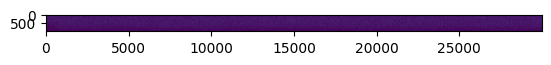

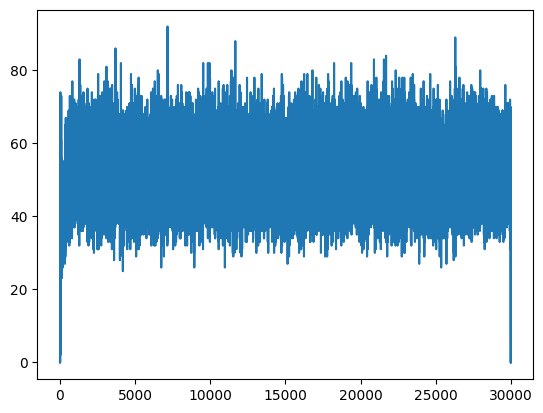

tensor(52.0099)


In [46]:

print("num spikes : ", torch.sum(spikes).cpu())
time_steps = spikes.shape[1]

plt.imshow(spikes[:,:].cpu())
plt.show()
plt.plot(torch.arange(time_steps)[:],spikes.sum(0)[:].cpu())
plt.show()
print(spikes.sum(0).mean().cpu())